**Aim-** Use TensorFlow to build our first Sequential model.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
np.set_printoptions(precision=3, suppress=True)

## Generate Dataset



In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
x, y = datasets.make_regression(n_samples=100, n_features=10, noise=5, random_state=4)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)
dataset = pd.DataFrame(x)
train_dataset = pd.DataFrame(x_train)
train_dataset['Output']=y_train
train_dataset_labels = train_dataset.pop('Output')
test_dataset = pd.DataFrame(x_test)
test_dataset['Output'] = y_test
test_dataset_labels = test_dataset.pop('Output')
dataset['Output'] = y
train_dataset

,0,1,2,3,4,5,6,7,8,9
0,0.772861,-1.379698,-0.527355,1.593241,0.097285,0.624984,-0.778922,1.140979,1.259162,1.557611
1,0.395608,0.849631,-0.941101,-1.346985,-1.603413,2.016347,-0.224818,0.249793,-1.353353,0.466200
2,-0.553373,-1.135040,0.073822,0.533735,1.083365,0.340763,0.106149,-0.703702,0.773991,0.814101
3,-0.334539,-0.172720,-0.276809,0.327939,0.898349,0.242673,1.133843,-0.386229,-0.019636,0.422848
4,1.135120,-0.527784,0.738520,0.709233,-0.682314,-0.399219,0.015748,1.321061,-0.153580,0.768587
...,...,...,...,...,...,...,...,...,...,...
75,0.170377,0.075524,-0.240938,-1.161567,-0.759352,0.352380,-0.276121,-0.704457,-2.425453,-1.197688
76,-0.606887,-0.087987,0.723342,1.546979,0.425072,-1.156816,0.046136,0.618670,0.332253,0.350997
77,0.993684,-1.730338,0.065035,-1.082626,-0.207354,-0.212866,0.590163,0.501810,1.109175,-0.422517
78,-0.079979,-1.104575,1.401277,0.649790,-0.291096,0.038635,1.555938,-0.852951,-0.890976,-0.480849


## Visualize Dataset
This is the same code from Assignment 1

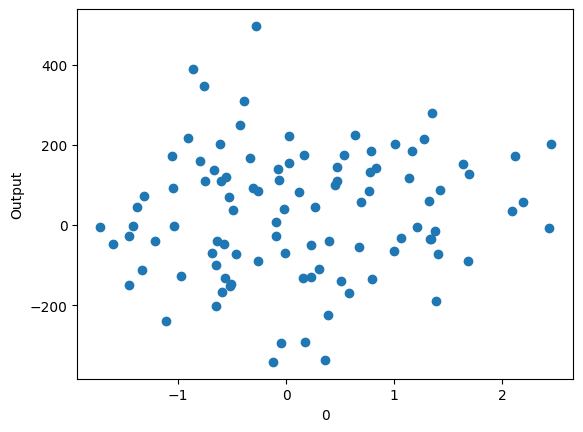

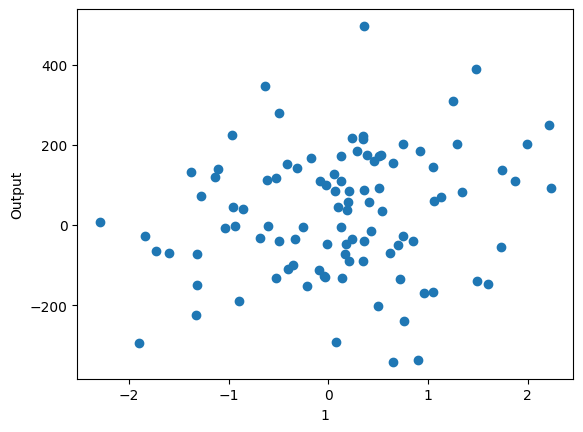

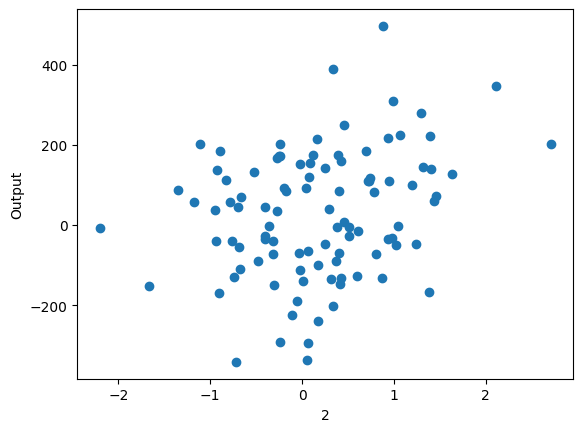

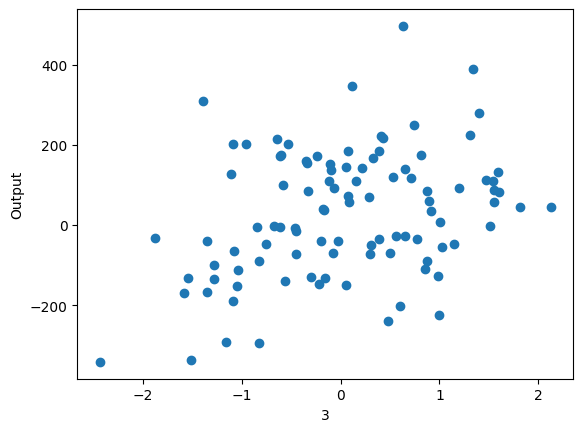

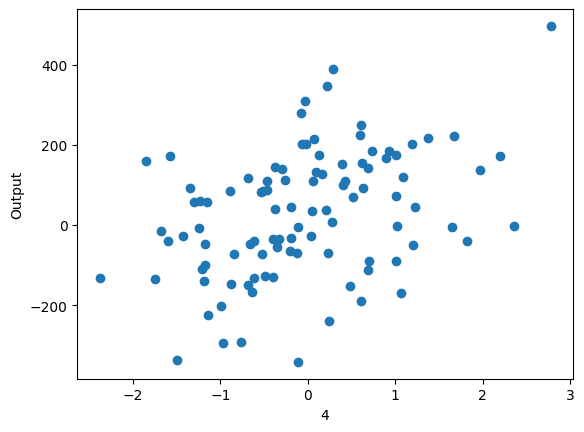

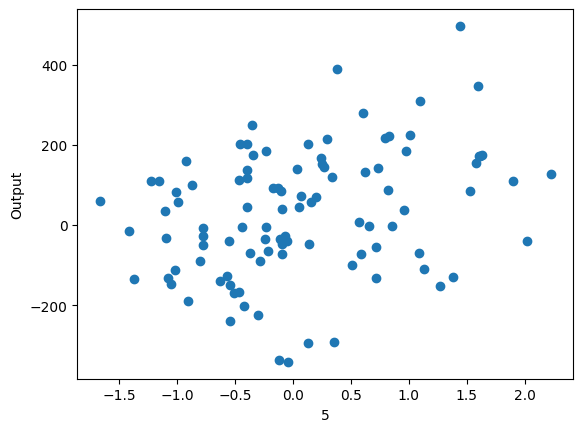

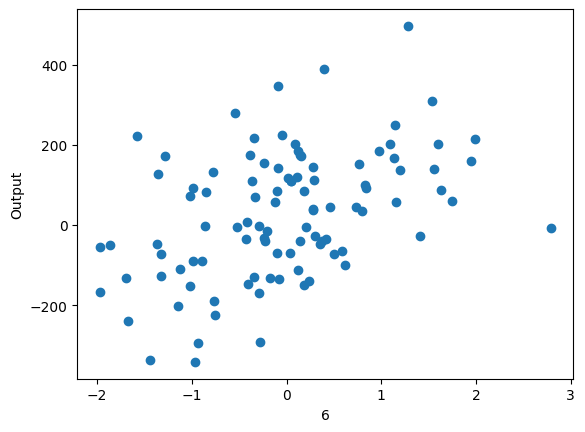

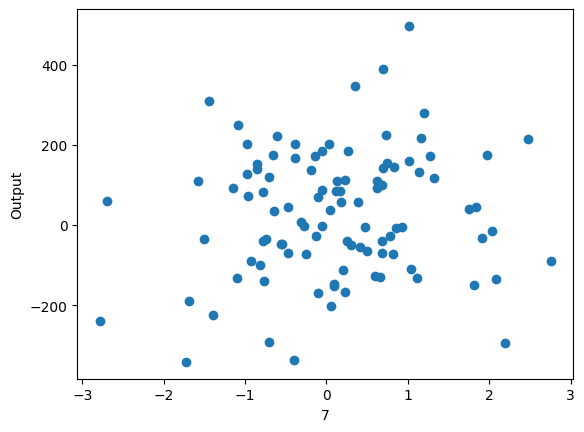

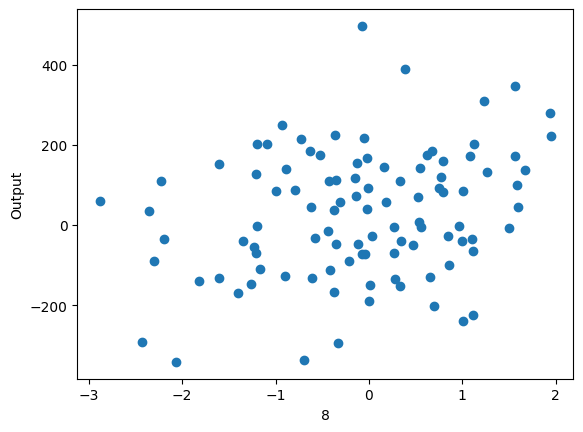

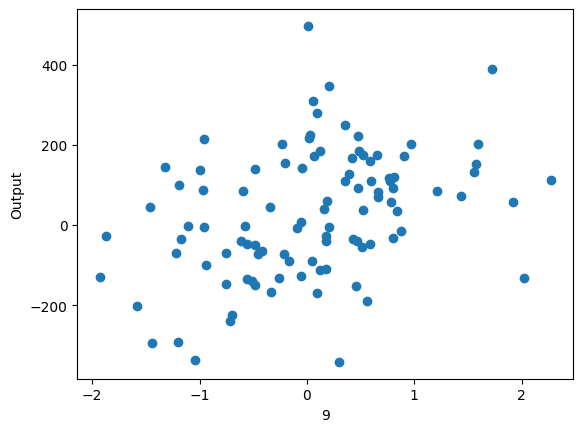

In [3]:
import matplotlib.pyplot as plt
# print(dataset[1])
# print(x.shape,y.shape)
for i in range(x.shape[1]):
  plt.xlabel(i)
  plt.ylabel('Output')
  # plt.plot(dataset[i],dataset['Output'])
  plt.scatter(dataset[i],dataset['Output'])
  plt.show()
# Your code here



In [4]:
#sns.pairplot(dataset[[0,1,2,3,4,5,6,7,8,9,'Output']], diag_kind='kde')

[Note: Use this Link for help](https://www.tensorflow.org/tutorials/keras/regression)

## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 10 \\
> Dense of shape 50 \\
> Dense of shape 10 \\
Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [5]:
import tensorflow as tf
#normaliser = tf.keras.layers.Normalization(axis=-1)
normaliser = tf.keras.layers.Normalization(axis=-1,mean=0,variance=1)
#normaliser.adapt(np.array(train_dataset))

# Your code here

In [6]:
first = np.array(train_dataset[:1]) #[columns:rows]

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normaliser(first).numpy())


First example: [[ 0.77 -1.38 -0.53  1.59  0.1   0.62 -0.78  1.14  1.26  1.56]]

Normalized: [[ 0.77 -1.38 -0.53  1.59  0.1   0.62 -0.78  1.14  1.26  1.56]]


In [7]:
model = tf.keras.Sequential([normaliser,
                           tf.keras.layers.Dense(units=50,activation='relu'),
                           tf.keras.layers.Dense(units=10,activation='relu'),
                             tf.keras.layers.Dense(units=5,activation='relu'),
                            tf.keras.layers.Dense(units=1)])
model.build(input_shape=(None, 10))
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),loss='mean_absolute_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 10)               0         
 n)                                                              
                                                                 
 dense (Dense)               (None, 50)                550       
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
______________________________________________________

In [8]:
%%time
history_dnn = model.fit(
    train_dataset,
    train_dataset_labels,
    validation_split=0.2,
    verbose=2, epochs=500)


Epoch 1/500
2/2 - 1s - loss: 125.7132 - val_loss: 133.6748 - 823ms/epoch - 412ms/step
Epoch 2/500
2/2 - 0s - loss: 125.7077 - val_loss: 133.6748 - 41ms/epoch - 21ms/step
Epoch 3/500
2/2 - 0s - loss: 125.6991 - val_loss: 133.6748 - 41ms/epoch - 21ms/step
Epoch 4/500
2/2 - 0s - loss: 125.6923 - val_loss: 133.6745 - 47ms/epoch - 24ms/step
Epoch 5/500
2/2 - 0s - loss: 125.6856 - val_loss: 133.6742 - 42ms/epoch - 21ms/step
Epoch 6/500
2/2 - 0s - loss: 125.6788 - val_loss: 133.6738 - 37ms/epoch - 19ms/step
Epoch 7/500
2/2 - 0s - loss: 125.6717 - val_loss: 133.6733 - 42ms/epoch - 21ms/step
Epoch 8/500
2/2 - 0s - loss: 125.6653 - val_loss: 133.6729 - 37ms/epoch - 19ms/step
Epoch 9/500
2/2 - 0s - loss: 125.6588 - val_loss: 133.6727 - 42ms/epoch - 21ms/step
Epoch 10/500
2/2 - 0s - loss: 125.6523 - val_loss: 133.6727 - 41ms/epoch - 21ms/step
Epoch 11/500
2/2 - 0s - loss: 125.6468 - val_loss: 133.6728 - 50ms/epoch - 25ms/step
Epoch 12/500
2/2 - 0s - loss: 125.6411 - val_loss: 133.6730 - 41ms/epoch

In [9]:
history_dnn.history
pass

## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

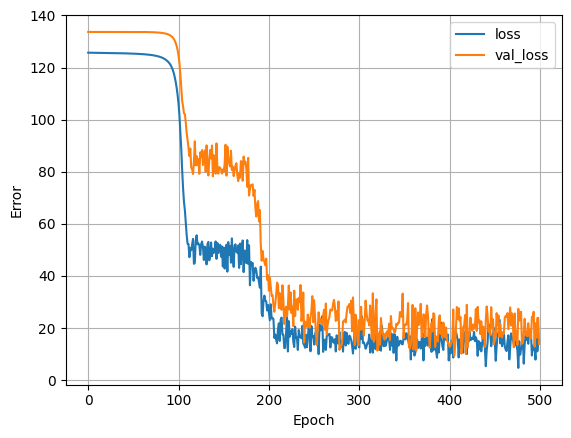

In [10]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
#   plt.ylim([100,200])
#   plt.xlim([100,200])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)
plot_loss(history_dnn)
# Your code here

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

1/1 [==============================] - 0s 131ms/step
[ 222.779 -199.175  155.224  -63.1    342.113  -27.181  -71.758  -81.969
   51.259  163.616  -30.011 -122.573   70.134 -335.154 -119.977  182.56
 -107.238 -141.438 -133.793  143.729]


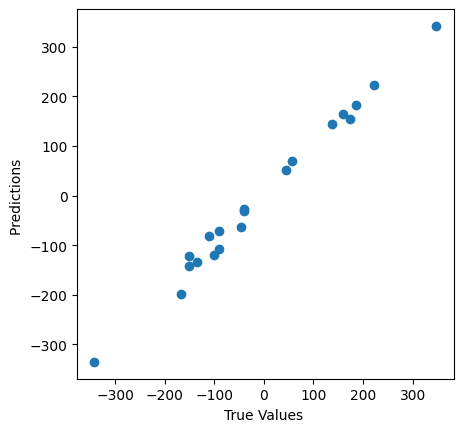

In [11]:
test_predictions = model.predict(test_dataset).flatten()
print(test_predictions)
a = plt.axes(aspect='equal')
plt.scatter(test_dataset_labels, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
# lims = [300, ]
# plt.xlim(lims)
# plt.ylim(lims)
_ = plt.plot()

In [12]:
# Insert the function for R2 Score
# def mean_squared_error(y_true, y_pred):
#     mean_se = (1/regressor.get_n_samples())*((np.subtract(y_test,y_predicted))**2)

#     return np.sum(mean_se)
    



def r2_score(y_true, y_pred):
    ssr= np.sum((np.subtract(y_true,y_pred))**2)
    mean = np.mean(y_true)
    sst = np.sum((np.subtract(mean,y_pred))**2)
    denom = ssr/sst
    r_score = 1-denom
    return r_score
    # return the r2 score
       

# mse =  mean_squared_error(test_dataset_labels,test_predictions)
# print("MSE:", mse)

accu = r2_score(test_dataset_labels,test_predictions)
print(f"Accuracy: {accu*100}%")

output = pd.DataFrame({'real':test_dataset_labels,'predicted':test_predictions})
output

Accuracy: 99.05363065348077%


,real,predicted
0,222.841343,222.779221
1,-167.552578,-199.175400
2,173.478511,155.223938
3,-46.300805,-63.100182
4,347.883140,342.113037
5,-39.573033,-27.181314
6,-90.567807,-71.757988
7,-110.252556,-81.968773
8,45.237675,51.258656
9,159.059644,163.615692


In [13]:
test_results={}
test_results['dnn_model'] = model.evaluate(test_dataset, test_dataset_labels, verbose=0)
test_results

{'dnn_model': 12.968597412109375}